In [1]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv, k_fold_cv_with_deviance_gbr, plot_feature_importance
from sklearn import ensemble
from scripts.data_preprocessing import load_data, exclude_outliers
import numpy as np
import pandas as pd

# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered, outliers = exclude_outliers(X, y)

param = {
    'n_estimators': [300, 500],
    'tol': [0.01, 0.001],
    "max_depth": [3, 6],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 10, 15],
    "learning_rate": [0.1, 0.01],
    "loss": ["absolute_error", "squared_error"],
    'min_impurity_decrease': [0.0, 0.01, 0.1]
}
gboost = ensemble.GradientBoostingRegressor(**param)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Fitting 6 folds for each of 576 candidates, totalling 3456 fits
Best Parameters: {'learning_rate': 0.01, 'loss': 'absolute_error', 'max_depth': 3, 'max_features': 'log2', 'min_impurity_decrease': 0.1, 'min_samples_split': 15, 'n_estimators': 300, 'tol': 0.01}


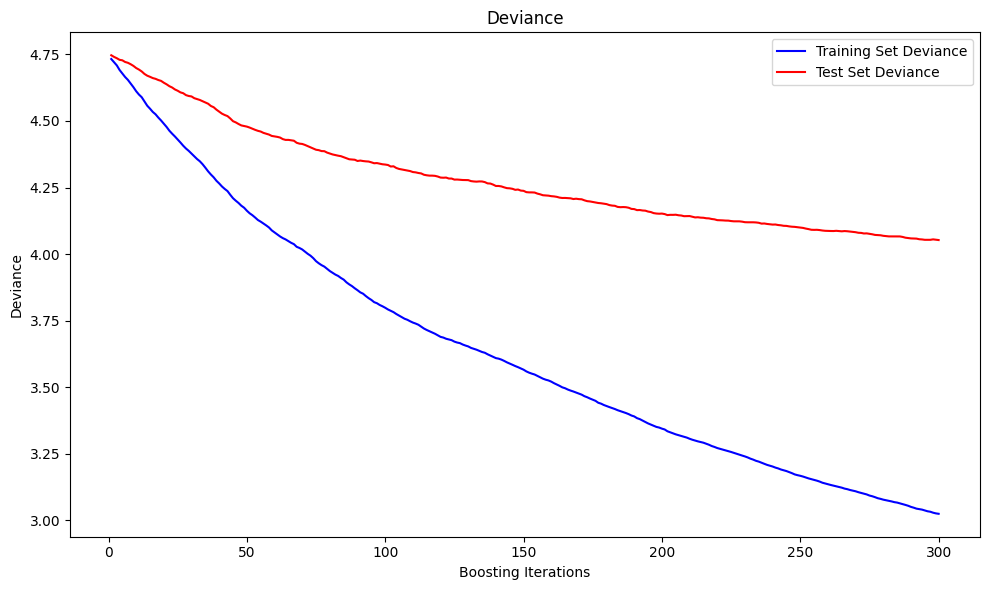

In [4]:
k_fold_cv_with_deviance_gbr(X, y, gboost, 6, param)

In [2]:
best_params = {
    'learning_rate': 0.01,
    'loss': 'absolute_error',
    'max_depth': 3,
    'max_features': 'log2',
    'min_samples_split': 15,
    'n_estimators': 300,
    'tol': 0.01,
    'min_impurity_decrease': 0.1,
}
gboost_best_params = ensemble.GradientBoostingRegressor(**best_params)


K-fold
R squared (CV): 0.18484540468359212
Average MSE (CV): 97.64978848266878
Average RMSE (CV): 9.881790752827586
Average MAE (CV): 4.336982318799127


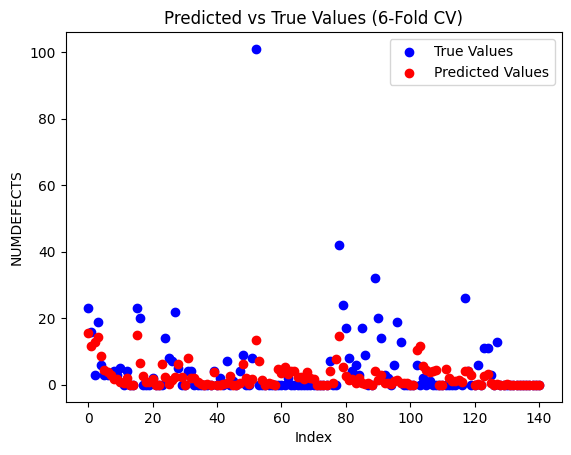

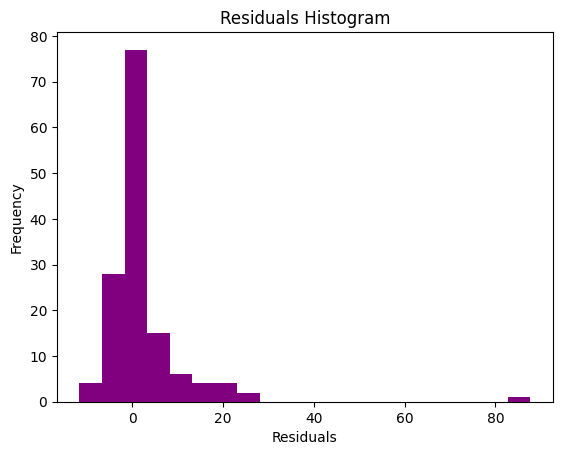

In [3]:
print('\nK-fold')
k_fold_cv(X, y, gboost_best_params, 6)

LOOCV
R squared (LOOCV): 0.19260899539211673
Average MSE (LOOCV): 96.71976490811092
Average RMSE (LOOCV): 9.834620730262602
Average MAE (LOOCV): 4.050797880474794


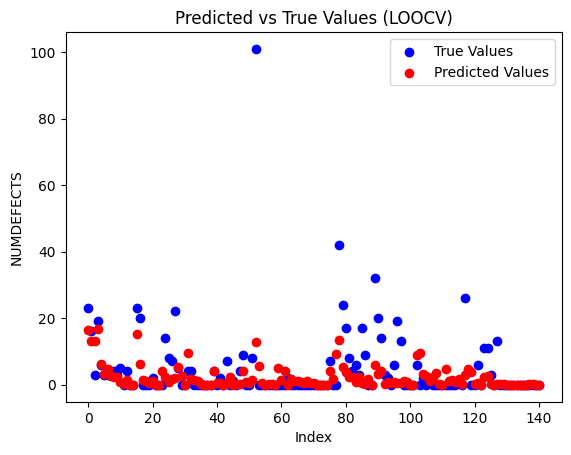

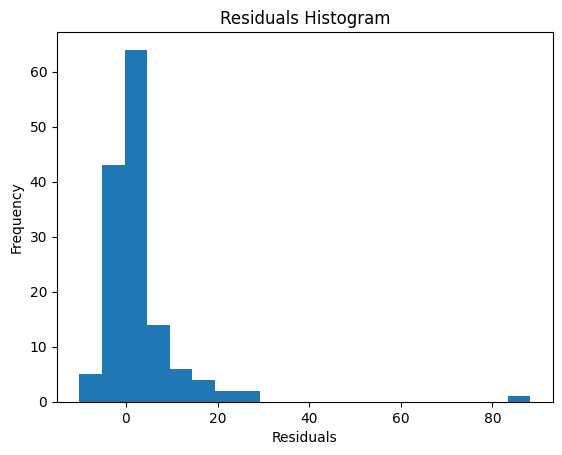

In [4]:
print('LOOCV')
loocv(X, y, gboost_best_params)

LOOCV
R squared (LOOCV): 0.12539942477382593
Average MSE (LOOCV): 36.314387601557286
Average RMSE (LOOCV): 6.026142016378081
Average MAE (LOOCV): 3.219481277247485


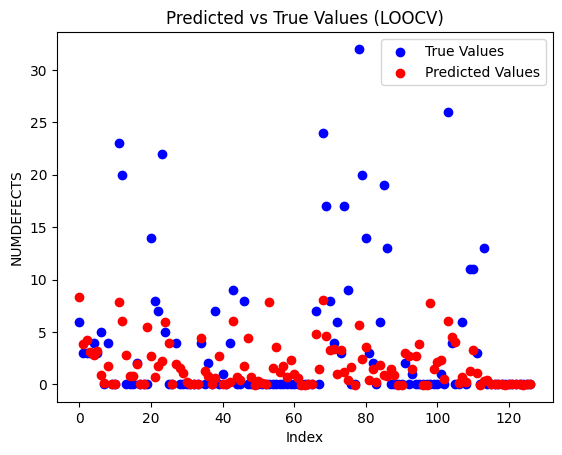

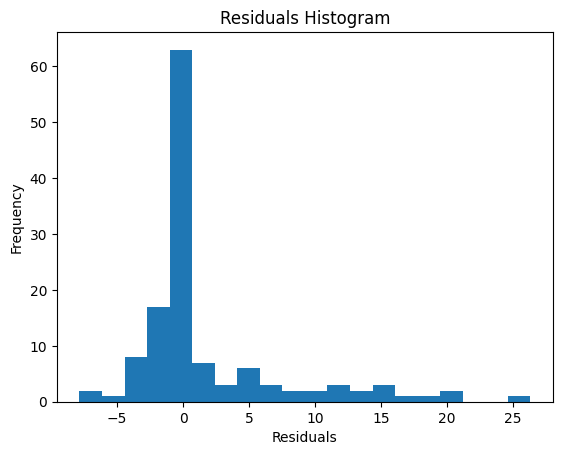


6-fold
R squared (CV): 0.061030924679971954
Average MSE (CV): 38.987039241575474
Average RMSE (CV): 6.243960221011619
Average MAE (CV): 3.5888834923993334


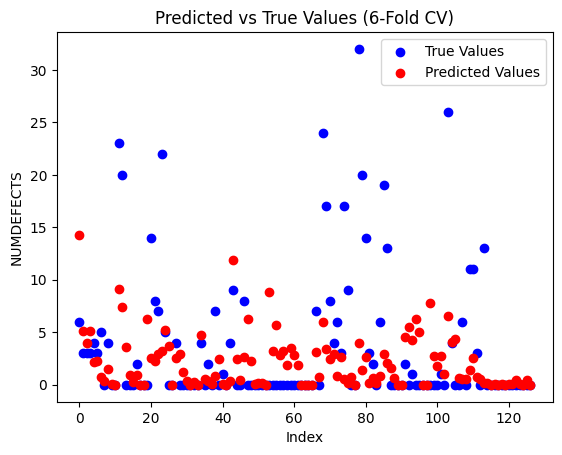

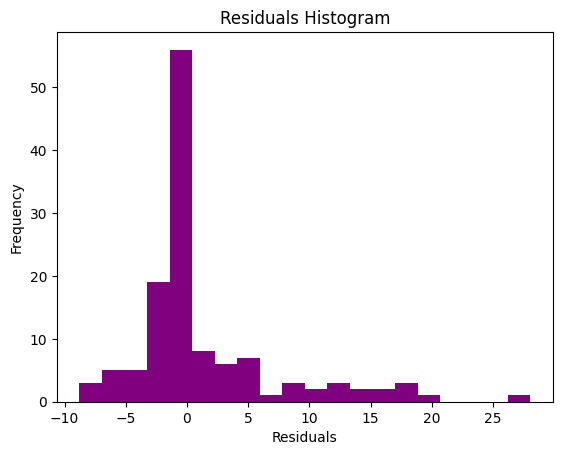

In [4]:
print('LOOCV')
loocv(X_filtered, y_filtered, gboost_best_params)

print('\n6-fold')
k_fold_cv(X_filtered, y_filtered, gboost_best_params, 6)

Feature Importance (MDI):
maxLOC_COMMENTS: 0.0205
maxHALSTEAD_EFFORT: 0.0206
maxHALSTEAD_LENGTH: 0.0208
sumHALSTEAD_VOLUME: 0.0215
sumHALSTEAD_DIFFICULTY: 0.0228
LACK_OF_COHESION_OF_METHODS: 0.0230
avgHALSTEAD_EFFORT: 0.0244
sumCYCLOMATIC_COMPLEXITY: 0.0249
maxNUM_UNIQUE_OPERANDS: 0.0255
sumHALSTEAD_PROG_TIME: 0.0285
maxLOC_TOTAL: 0.0296
maxHALSTEAD_VOLUME: 0.0326
COUPLING_BETWEEN_OBJECTS: 0.0340
sumBRANCH_COUNT: 0.0346
sumLOC_TOTAL: 0.0422


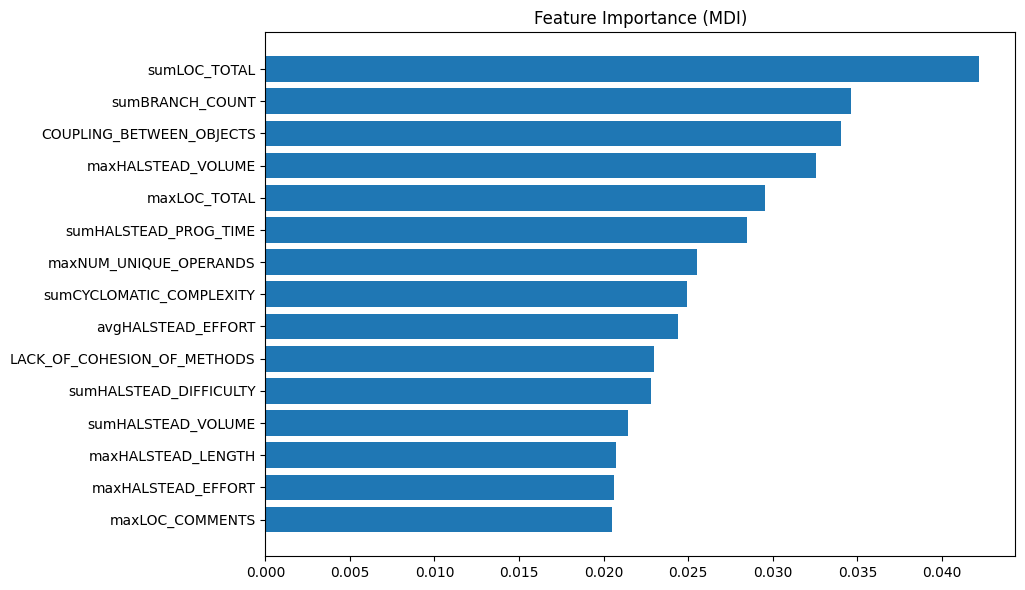

In [39]:
gboost_best_params.fit(X, y)
plot_feature_importance(X, gboost_best_params, 15)